## 線形補間

## 0 必要なパッケージのimport、補間関数のinclude

In [2]:
using Gadfly
include("interp.jl")

Interp

interp.jlの中身はこの通り。

In [3]:
;cat interp.jl

module Interp

immutable LinInterp
    grid::Array
    vals::Array
end

function Base.call(f::LinInterp, x::Real)
    grid = f.grid
    vals = f.vals
    
    if x <= grid[1]
        index_1 = 2
        index_2 = 1
    elseif x >= grid[length(grid)]
        index_1 = length(grid) 
        index_2 = length(grid) - 1
    else
        index_1 = searchsortedlast(grid, x)
        index_2 = index_1 + 1
    end
    x_1 = grid[index_1]
    x_2 = grid[index_2]
    y_1 = vals[index_1]
    y_2 = vals[index_2]

    y = ((y_2- y_1)/(x_2 - x_1))*(x - x_1) + y_1
    return y
end

function Base.call{T<:Real}(f::LinInterp, x::AbstractVector{T})
    grid = f.grid
    vals = f.vals
    
    y = zeros(length(x))
    for i in 1:length(x)
        y[i] = f(x[i])
    end
    return y
end

end

## 1 簡単な例

In [4]:
grid = [1, 2]
vals = [2, 0]
f = Interp.LinInterp(grid, vals)

println(f(1.25))
println(f(100))
println(f([1.25, 100]))
println(f([1.25, 1.5, 1.9, 2.00, 100]))

1.5
-196.0
[1.5,-196.0]
[1.5,1.0,0.20000000000000018,0.0,-196.0]


## 2 sin関数の補間

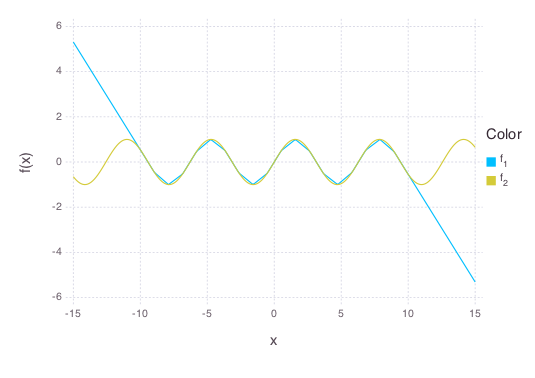

In [8]:
grid = linspace(-10, 10, 20)
interp = Interp.LinInterp(grid, sin(grid))
func(x) = interp(x)
plot([func, sin], -15, 15)

範囲外を最後（or最初）の区間の関数の形に合わせることは少し問題があるのかもしれない。

## 3 QuantEconのA Simple Optimal Growth Modelの補間を自分の関数で代用

[この節](http://quant-econ.net/jl/optgrowth.html#fitted-value-iteration)の図を描く[コード](https://github.com/QuantEcon/QuantEcon.applications/blob/master/optgrowth/linapprox.jl)の[この行](https://github.com/QuantEcon/QuantEcon.applications/blob/master/optgrowth/linapprox.jl#L7)を置き換える。

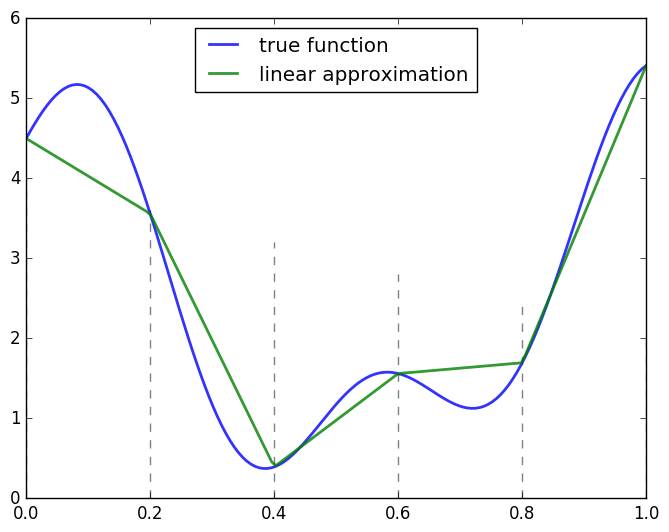

PyObject <matplotlib.legend.Legend object at 0x31bd73710>

In [19]:
using Grid
using PyPlot

g(x) = 2 .* cos(6x) .+ sin(14x) .+ 2.5
c_grid = 0:.2:1

Af = Interp.LinInterp(c_grid, g(c_grid))

g_grid = linspace(0, 1, 150)

fig = figure()
ax = fig[:add_subplot](111)

ax[:plot](g_grid, g(g_grid), "b-", lw=2, alpha=0.8, label="true function")
ax[:plot](g_grid, Af(g_grid), "g-", lw=2, alpha=0.8,
          label="linear approximation")

ax[:vlines]([c_grid], [c_grid] * 0, f(c_grid), linestyle="dashed", alpha=0.5)
ax[:legend](loc="upper center")

自分の関数に置き換えた部分以外はほぼそのまま元のコードを使用した。

## おまけ

すごく適当に遊んでみた。

富士山である。

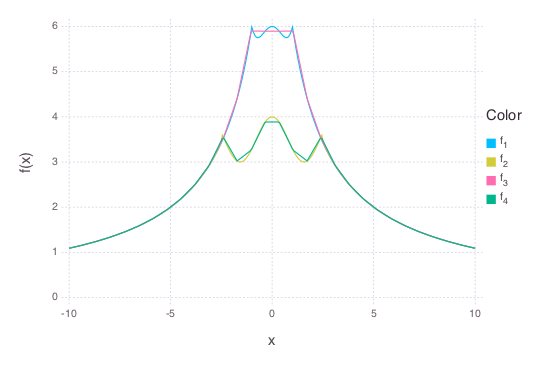

In [15]:
function fuzhisan_1(x)
    if abs(x) <= 1
        y = x^4-x^2+6
    else
        y = 12/(abs(x)+1)
    end
    return y
end

function fuzhisan_2(x)
    if abs(x) <= 2.5
        y = 0.5*cos(2*x)+7/2
    else 
        y = 12/(abs(x)+1)
    end
    return y
end

grid = linspace(-10, 10, 30)
vals_1 = [fuzhisan_1(x) for x in grid]
vals_2 = [fuzhisan_2(x) for x in grid]

j_1 = Interp.LinInterp(grid, vals_1)
j_2 = Interp.LinInterp(grid, vals_2)

f_interp_1(x) = j_1(x)
f_interp_2(x) = j_2(x)

plot([fuzhisan_1, fuzhisan_2, f_interp_1, f_interp_2], -10, 10)

### ふじの歌
青空高く　そびえ立ち  
からだに雪の　着物着て  
霞のすそを　遠く曳く  
富士は日本一の山  